## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [1]:
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'data/train'
valid_path = 'data/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('data/train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
class_names = ['backpack', 'footwear', 'glasses', 'watch']

In [55]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 classes = class_names)

Found 475 images belonging to 4 classes.


In [56]:
test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            classes = class_names)

Found 264 images belonging to 4 classes.


In [60]:
sum(training_set.classes)

697

In [15]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Epoch 1/50
15/15 [==============================] - 18s 1s/step - loss: 0.8279 - accuracy: 0.6905 - val_loss: 0.3642 - val_accuracy: 0.8977
Epoch 2/50
15/15 [==============================] - 15s 1s/step - loss: 0.1869 - accuracy: 0.9432 - val_loss: 0.1618 - val_accuracy: 0.9583
Epoch 3/50
15/15 [==============================] - 15s 1s/step - loss: 0.0647 - accuracy: 0.9832 - val_loss: 0.1674 - val_accuracy: 0.9545
Epoch 4/50
15/15 [==============================] - 15s 997ms/step - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.1647 - val_accuracy: 0.9470
Epoch 5/50
15/15 [==============================] - 15s 994ms/step - loss: 0.0302 - accuracy: 0.9916 - val_loss: 0.1688 - val_accuracy: 0.9470
Epoch 6/50
15/15 [==============================] - 15s 1s/step - loss: 0.0236 - accuracy: 0.9937 - val_loss: 0.1584 - val_accuracy: 0.9621
Epoch 7/50
15/15 [==============================] - 15s 1s/step - loss: 0.0134 - accuracy: 1.0000 - val_loss: 0.1586 - val_accuracy: 0.9583
Epoch 8/50
15/

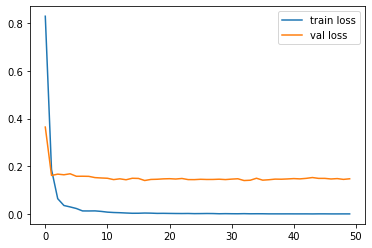

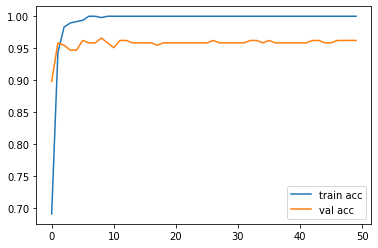

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [18]:

y_pred = model.predict(test_set)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [19]:
y_pred

array([[6.0046275e-09, 2.4639914e-07, 9.9999928e-01, 4.5912191e-07],
       [1.7698703e-06, 3.0453828e-07, 5.1526250e-09, 9.9999797e-01],
       [5.5729374e-06, 1.0927335e-03, 9.9868792e-01, 2.1376327e-04],
       ...,
       [3.4187906e-07, 9.9998331e-01, 1.6281210e-05, 8.6647397e-08],
       [5.3622205e-07, 1.5993197e-09, 1.0045987e-08, 9.9999940e-01],
       [9.9999928e-01, 7.4078071e-07, 1.1202449e-08, 3.7085016e-08]],
      dtype=float32)

In [20]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [21]:
y_pred

array([2, 3, 2, 3, 0, 0, 0, 3, 2, 1, 0, 3, 2, 1, 1, 0, 0, 2, 0, 1, 3, 0,
       0, 0, 2, 0, 1, 3, 0, 3, 1, 2, 3, 3, 0, 3, 3, 0, 3, 2, 3, 0, 2, 0,
       0, 1, 0, 1, 3, 1, 1, 1, 2, 3, 3, 0, 2, 0, 2, 1, 1, 3, 3, 0, 0, 0,
       2, 0, 3, 0, 1, 2, 1, 0, 0, 1, 0, 2, 3, 1, 2, 3, 3, 3, 1, 2, 3, 3,
       3, 1, 2, 1, 0, 1, 0, 1, 3, 1, 0, 2, 0, 1, 3, 0, 0, 2, 0, 1, 2, 3,
       2, 3, 2, 2, 2, 1, 2, 3, 1, 3, 0, 3, 1, 3, 2, 3, 3, 0, 3, 3, 1, 2,
       1, 0, 1, 3, 1, 2, 1, 0, 3, 1, 1, 3, 2, 1, 0, 1, 0, 2, 3, 1, 2, 1,
       3, 1, 0, 3, 0, 2, 0, 1, 3, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 2, 2, 2,
       0, 1, 2, 3, 2, 2, 1, 2, 1, 0, 1, 0, 3, 1, 0, 2, 0, 2, 2, 3, 2, 2,
       0, 1, 1, 2, 1, 2, 0, 0, 1, 2, 3, 1, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1,
       2, 0, 3, 1, 3, 2, 1, 1, 2, 2, 0, 1, 2, 3, 3, 3, 3, 3, 3, 0, 3, 0,
       0, 3, 3, 2, 1, 0, 1, 3, 1, 3, 1, 2, 2, 3, 0, 0, 3, 2, 2, 1, 3, 0])

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [23]:
model=load_model('model_vgg16.h5')

In [40]:
img=image.load_img('data/train/backpack/00000000.jpg',target_size=(224,224))



In [41]:
x=image.img_to_array(img)
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [42]:
x.shape

(224, 224, 3)

In [43]:
x=x/255

In [44]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
predicted = model.predict(img_data)

In [61]:
predicted_value=np.argmax(predicted, axis=1)
predicted_value

array([3])